In [2]:
import meep as mp
import math
import matplotlib
#matplotlib.use('agg')
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import BK7

wvl_min = 0.760  # min wavelength
wvl_max = 0.940  # max wavelength
fmin = 1 / wvl_max  # min frequency
fmax = 1 / wvl_min  # max frequency
fcen = 0.5 * (fmin + fmax)  # center frequency
df = fmax - fmin  # frequency width
nfreq = 200  # number of frequency bins

s = 20
resolution = 50
dpml = 2

cell_size = mp.Vector3(s,s,0)

boundary_layers = [mp.PML(thickness=dpml)]

beam_x0 = mp.Vector3(0,4.0)    # beam focus (relative to source center)
rot_angle = 0  # CCW rotation angle about z axis (0: +y axis)
beam_kdir = mp.Vector3(0,1,0).rotate(mp.Vector3(0,0,1),math.radians(rot_angle))  # beam propagation direction
beam_w0 = 0.3  # beam waist radius
beam_E0 = mp.Vector3(0,0,1)

In [6]:
# source
sources = [mp.GaussianBeamSource(src=mp.ContinuousSource(fcen,fwidth=df),
                                 center=mp.Vector3(0,-0.5*s+dpml+1.0),
                                 size=mp.Vector3(s),
                                 beam_x0=beam_x0,
                                 beam_kdir=beam_kdir,
                                 beam_w0=beam_w0,
                                 beam_E0=beam_E0)]

In [7]:
# cover slip+ cylinder 
geometry = [mp.Block(mp.Vector3(mp.inf,40,mp.inf),
                     center=mp.Vector3(0,-20,0),
                     material=BK7),
            mp.Cylinder(radius=3,center=mp.Vector3(0,2.8,0),
                        axis=mp.Vector3(0,0,1),
                        material=BK7,
                        height=4),
            ]

In [8]:
sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)


sim.run(until=20)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000531912 s
Working in 2D dimensions.
Computational cell is 20 x 20 x 0 with resolution 50
     block, center = (0,-20,0)
          size (1e+20,40,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,2.8,0)
          radius 3, height 4, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 1.78772 s
lorentzian susceptibility: frequency=0.0982658, gamma=0
lorentzian susceptibility: frequency=7.0679, gamma=0
lorentzian susceptibility: frequency=12.9092, gamma=0
-----------
Meep progress: 2.2/20.0 = 11.0% done in 4.0s, 32.4s to go
on time step 220 (time=2.2), 0.018198 s/step
Meep progress: 4.48/20.0 = 22.4% done in 8.0s, 27.8s to go
on time step 448 (time=4.48), 0.0176089 s/step
Meep progress: 6.61/20.0 = 33.0% done in 12.0s, 24.4s to go
on time step 661 (time=6.61), 0.0187878 s/step
Meep progress: 8

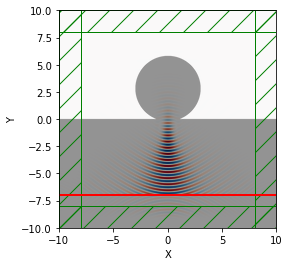

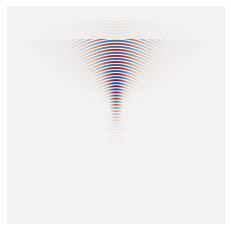

In [9]:
sim.plot2D(fields=mp.Ez,
           output_plane=mp.Volume(center=mp.Vector3(),
                                  size=mp.Vector3(s,s)))

plt.savefig('Ez_angle{}.png'.format(rot_angle),bbox_inches='tight',pad_inches=0)



eps_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()